<a href="https://colab.research.google.com/github/mkbahk/AmazonBraket/blob/main/Qiskit_HelloWorld_with_LocalAerSimulator_get_backend_mkbahk_20241015.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install qiskit[visualization]=='1.2.4'
#%pip install qiskit_ibm_runtime=='0.30.0'
%pip install qiskit_aer=='0.15.1'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 33.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 5.2 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=b6f2402cfb02c095cc1b700cca20ac5679b721454f1ca4f53586bc1cd54d3c2b
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 24.7 MB/s eta 0:00:00


In [2]:
%pip show qiskit qiskit_aer

Name: qiskit
Version: 1.2.4
Summary: An open-source SDK for working with quantum computers at the level of extended quantum circuits, operators, and primitives.
Home-page: https://www.ibm.com/quantum/qiskit
Author: 
Author-email: Qiskit Development Team <qiskit@us.ibm.com>
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: dill, numpy, python-dateutil, rustworkx, scipy, stevedore, symengine, sympy, typing-extensions
Required-by: qiskit-aer
---
Name: qiskit-aer
Version: 0.15.1
Summary: Aer - High performance simulators for Qiskit
Home-page: https://github.com/Qiskit/qiskit-aer
Author: AER Development Team
Author-email: qiskit@us.ibm.com
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy, psutil, qiskit, scipy
Required-by: 


In [3]:
%pip list

Package                            Version
---------------------------------- -------------------
absl-py                            1.4.0
accelerate                         0.34.2
aiohappyeyeballs                   2.4.3
aiohttp                            3.10.10
aiosignal                          1.3.1
alabaster                          0.7.16
albucore                           0.0.16
albumentations                     1.4.15
altair                             4.2.2
annotated-types                    0.7.0
anyio                              3.7.1
argon2-cffi                        23.1.0
argon2-cffi-bindings               21.2.0
array_record                       0.5.1
arviz                              0.19.0
astropy                            6.1.4
astropy-iers-data                  0.2024.10.7.0.32.46
astunparse                         1.6.3
async-timeout                      4.0.3
atpublic                           4.1.0
attrs                              24.2.0
audioread        

In [4]:
import qiskit
qiskit.__version__

'1.2.4'

In [5]:
import qiskit_aer
qiskit_aer.__version__

'0.15.1'

# Hello World example on a 2-Qubit Bell State

1. Map the Problem to Circuits and Operators

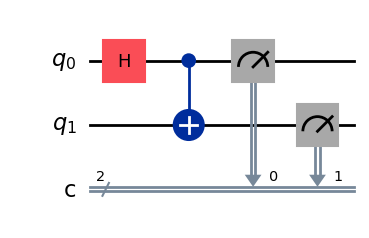

In [11]:
#아래 circuit은 estimator primitive를 위한 것

from qiskit import QuantumCircuit

#bell_circuit = QuantumCircuit(2)
qc = QuantumCircuit(2, 2) # estimator에서 에러
qc.h(0)
qc.cx(0, 1)
qc.measure([0,1], [0,1]) # estimator에서는 사용않함
qc.draw(output='mpl')

In [12]:
from qiskit_aer import Aer
simulator = Aer.get_backend('statevector_simulator')

In [13]:
from qiskit import transpile
qc_compiled = transpile(qc, simulator)

In [35]:
# Execute the circuit and get the result
job = simulator.run(qc_compiled, shots=1024)
result = job.result()

In [36]:
result

Result(backend_name='statevector_simulator', backend_version='0.15.1', qobj_id='', job_id='247a8afc-4561-4322-b2df-7f5227c312ac', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 493, '0x3': 531}, statevector=Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))), header=QobjExperimentHeader(creg_sizes=[['c', 2]], global_phase=0.0, memory_slots=2, n_qubits=2, name='circuit-167', qreg_sizes=[['q', 2]], metadata={}), status=DONE, seed_simulator=1281705723, metadata={'time_taken': 0.020061278, 'num_bind_params': 1, 'parallel_state_update': 1, 'required_memory_mb': 1, 'input_qubit_map': [[1, 1], [0, 0]], 'method': 'statevector', 'device': 'CPU', 'num_qubits': 2, 'active_input_qubits': [0, 1], 'num_clbits': 2, 'remapped_qubits': False, 'parallel_shots': 2, 'runtime_parameter_bind': False, 'max_memory_mb': 12978, 'noise': 'ideal', 'measure_sampling': False, 'batched_shots_optimization': False, 'result_ty

In [37]:
result.backend_name

'statevector_simulator'

In [38]:
result.results

[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 493, '0x3': 531}, statevector=Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
             dims=(2, 2))), header=QobjExperimentHeader(creg_sizes=[['c', 2]], global_phase=0.0, memory_slots=2, n_qubits=2, name='circuit-167', qreg_sizes=[['q', 2]], metadata={}), status=DONE, seed_simulator=1281705723, metadata={'time_taken': 0.020061278, 'num_bind_params': 1, 'parallel_state_update': 1, 'required_memory_mb': 1, 'input_qubit_map': [[1, 1], [0, 0]], 'method': 'statevector', 'device': 'CPU', 'num_qubits': 2, 'active_input_qubits': [0, 1], 'num_clbits': 2, 'remapped_qubits': False, 'parallel_shots': 2, 'runtime_parameter_bind': False, 'max_memory_mb': 12978, 'noise': 'ideal', 'measure_sampling': False, 'batched_shots_optimization': False, 'result_types': {'statevector': 'save_statevector'}, 'result_subtypes': {'statevector': 'single'}, 'fusion': {'applied': False, 'max_fused_qubits': 5, 'threshold

In [39]:
result.results[0].data.counts

{'0x0': 493, '0x3': 531}

In [40]:
counts = result.get_counts()

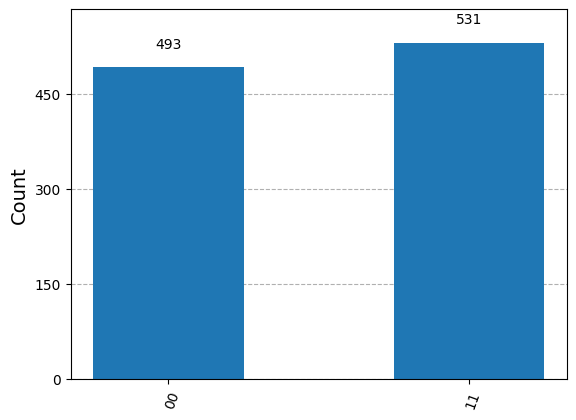

In [41]:
from qiskit.visualization import plot_histogram # Import plot_histogram
plot_histogram(counts)

In [42]:
statevector = result.get_statevector()

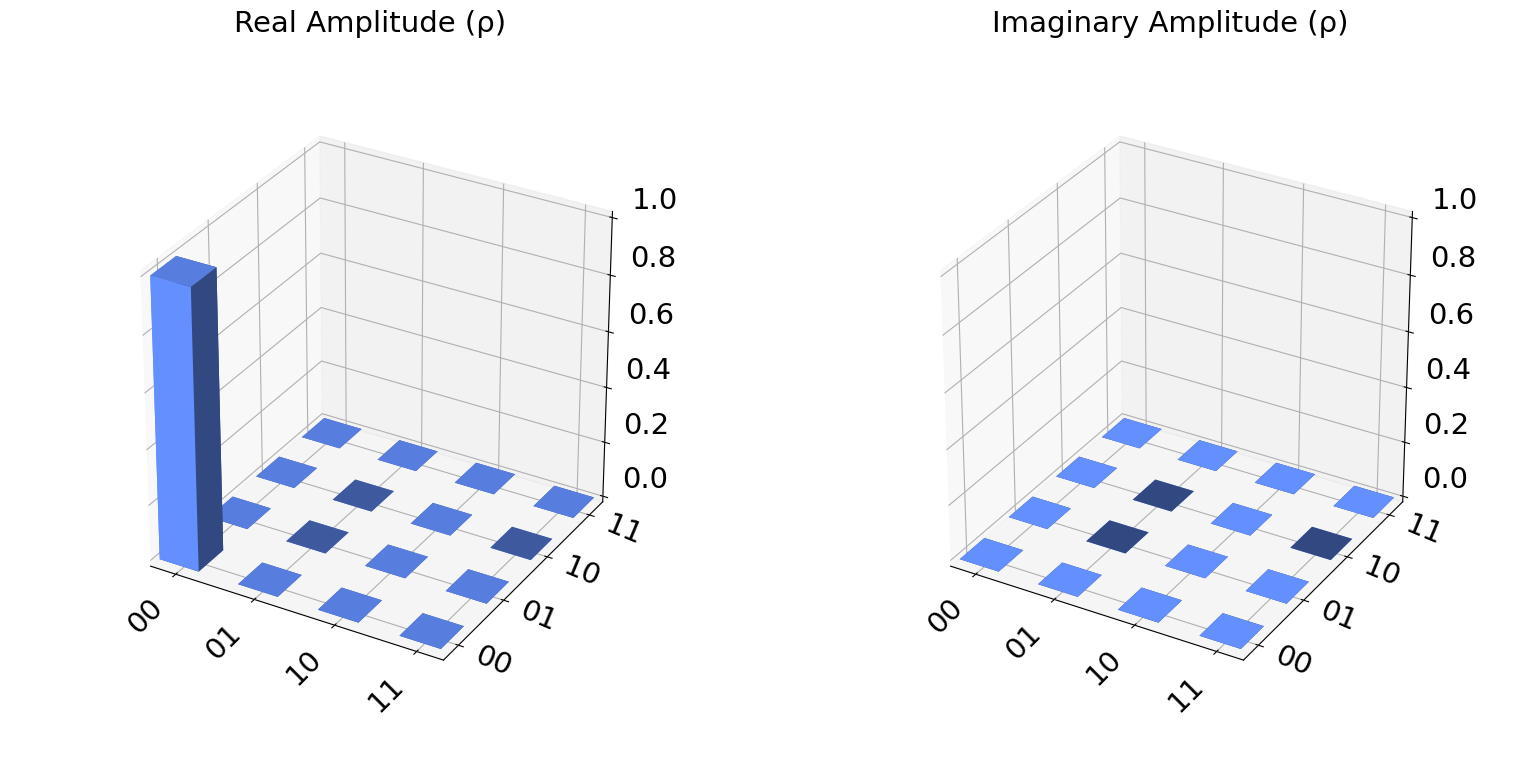

In [85]:
from qiskit.visualization import plot_state_city
plot_state_city(statevector)